In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
# 1. LINEAR REGRESSION
#import the divorce dataset
dataset = pd.read_csv('divorce_data.csv', sep=';')
dataset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
#split dataset in x and y, taking 'Divorce' for y and the rest for X
df = dataset
df = df.drop('Divorce', axis=1)
X = df
y = dataset['Divorce']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)


In [4]:
#train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
#Getting the coefficient for each question, seeing how much of an impact each question has on the outcome.
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
y_pred =regressor.predict(X_test)

     Coefficient
Q1     -0.013293
Q2      0.017638
Q3      0.004574
Q4      0.042512
Q5     -0.075919
Q6      0.051607
Q7      0.016412
Q8     -0.003203
Q9      0.083836
Q10     0.028694
Q11     0.056977
Q12    -0.066230
Q13    -0.024583
Q14     0.083497
Q15    -0.027052
Q16     0.017621
Q17     0.017525
Q18    -0.035219
Q19    -0.013869
Q20    -0.002839
Q21    -0.030053
Q22    -0.053650
Q23     0.001829
Q24    -0.011339
Q25    -0.023656
Q26     0.051911
Q27    -0.023414
Q28    -0.017548
Q29     0.103840
Q30     0.034567
Q31     0.016170
Q32     0.022704
Q33     0.025623
Q34    -0.006345
Q35    -0.041235
Q36     0.047354
Q37     0.003599
Q38    -0.045496
Q39     0.016244
Q40     0.115596
Q41    -0.021344
Q42    -0.016185
Q43    -0.032939
Q44     0.016180
Q45     0.037959
Q46    -0.021243
Q47     0.029070
Q48    -0.018787
Q49    -0.000657
Q50     0.049474
Q51    -0.059370
Q52     0.034796
Q53     0.014698
Q54    -0.004973


In [8]:
#Getting Mean absolute error, Mean squared error and the Root mean Squared error scores.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14189135655133076
Mean Squared Error: 0.04753577930962321
Root Mean Squared Error: 0.21802701509130287


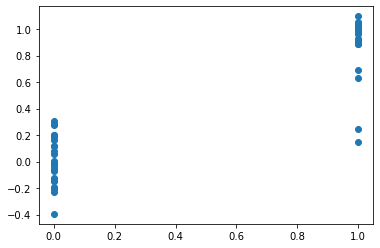

In [9]:
#Plotting y_test to y_pred, seeing a clear correlation
plt.scatter(y_test, y_pred)

In [10]:
#Getting the accuracy score.
metrics.r2_score(y_test, y_pred)

0.8080115497137734

In [11]:
#Because a confusion matrix with one binary and one non-binary is impossible, I convert the y_pred, putting everythin under 0.5 to 0 and everything above to 1 by making in integrals. 
y_pred = y_pred.astype(int)

In [12]:
#Printing the confusion matrix
confusion_matrix(y_test, y_pred)

array([[28,  0],
       [16,  7]])

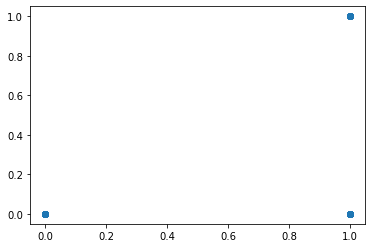

In [13]:
#The new scatterplot with the binary values
plt.scatter(y_test, y_pred)

In [14]:
# 2. LOGISTIC REGRESSION
#selecting most relevant features, dropping columns that are lacking data
df = pd.read_csv("divorce_data.csv", sep=';')
df2 = df.dropna()

df2.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [15]:
#defining x and y:
y = df2['Divorce']
X = df2.drop(['Divorce'], axis=1)

In [16]:
#Classifiers, fitting and predictions
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

In [17]:
#Evaluation of the model - CONFUSION MATRIX
print("the confusion matrix is:")
confusion_matrix(y_test, y_pred)

the confusion matrix is:


array([[28,  0],
       [ 2, 21]])

In [18]:
#Evaluation of the model - ACCURACY SCORE
print("the accuracy score is:")
accuracy_score(y_test, y_pred)

the accuracy score is:


0.9607843137254902

In [19]:
#Evaluation of the model - CROSS VALIDATION
logisticRegr = LogisticRegression()
scores = cross_val_score(logisticRegr, X, y, cv=15)
print("cross validation scores", scores)

cross validation scores [0.75 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.  ]


In [20]:
#Evaluation of the model - CROSS VALIDATION AVERAGE
average=sum(scores)/len(scores)
print("average cross validation", average)

average cross validation 0.9833333333333333


In [ ]:
# 3. DECISION TREE

In [21]:
#Classifiers, fitting and predictions
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 1 1 0 1]


In [22]:
#Evaluation of the model - CONFUSION MATRIX
confusion_matrix(y_test, y_pred)

array([[27,  1],
       [ 2, 21]])

In [23]:
#Evaluation of the model - ACCURACY SCORE
print("Accuracy", accuracy_score(y_test, y_pred))
#sometimes the accuracy score of this is 1, however, it is not always. We recognize that models that get 
#an accuracy score of 1 usually mean something is wrong. However, considering the nature of the dataset, 
#we believe that it just really is that easy to predict if someone will get divorced. This is supported 
#by the scatter plot, and by the cross validation score. 

Accuracy 0.9411764705882353


In [24]:
#Evaluation of the model - CROSS VALIDATION 
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=15)
print("cross validation scores", scores)

cross validation scores [0.75       0.91666667 1.         1.         1.         1.
 1.         1.         1.         1.         0.90909091 1.
 1.         1.         1.        ]


In [25]:
#Evaluation of the model - CROSS VALIDATION AVERAGE
average=sum(scores)/len(scores)
print("average cross validation", average)

average cross validation 0.9717171717171716
